In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [3]:
import requests
import json
from bs4 import BeautifulSoup as bs
Details = []
#reqURL = 'https://www.bbc.co.uk/news/politics/rss.xml?edition=uk'
#reqURL = 'https://www.bbc.co.uk/news/health/rss.xml?edition=uk'
reqURL = 'https://www.bbc.co.uk/news/sport/rss.xml?edition=uk'
#reqURL = 'https://www.bbc.co.uk/news/science_and_environment/rss.xml?edition=uk'

if(reqURL != None and reqURL != '/'):
    description = bs(requests.get(
                                    reqURL.strip()
                                ).text,
                    'html.parser'
                    ).findAll('description')
    for desc in description:
        Details.append(desc.get_text())
#print(Details)
import pandas as pd
df = pd.DataFrame(Details, columns=["Details"])
df.to_csv('BBCSport.csv', index=False)

/Users/swathipathaikara/miniforge3/envs/tensorflow/lib/python3.9/site-packages/bs4/builder/__init__.py:545: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.
  warnings.warn(


In [95]:
data = pd.read_csv('/Users/swathipathaikara/Desktop/DCSI/Information Retrieval/BBCDocs.csv')
data.head()

,Document,Label
0,The latest stories from the Health section of ...,Health
1,One of the main types of blood cancer is not o...,Health
2,"Health inspectors rate a hospital ""inadequate""...",Health
3,Early trial data shows a drug developed using ...,Health
4,UK researchers say they have found a new way t...,Health


In [70]:
len(data)

114

In [5]:
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
sw = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/swathipathaikara/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
nltk.download("punkt")
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
ps = PorterStemmer()
filtered_docs = []
for doc in data.Document:
    tokens = word_tokenize(doc)
    tmp = ""
    for w in tokens:
        if w not in sw:
            tmp += ps.stem(w) + " "
    filtered_docs.append(tmp)

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/swathipathaikara/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [39]:
len(filtered_docs)

114

In [143]:
filtered_docs

['the latest stori health section bbc new web site . ',
 'one main type blood cancer one 11 distinct diseas , detail genet analysi suggest . ',
 "health inspector rate hospit `` inadequ '' `` chaotic '' emerg depart . ",
 'earli trial data show drug develop use artifici intellig slow growth cancer clinic trial . ',
 'uk research say found new way tell heart attack sever might caus last harm - look bruis bleed heart muscl . ',
 "high demand wigan hospit 's a & e depart partial blame temporari closur nearbi casualti unit . ",
 "scientist investig whether bubbl drink could boost success cancer treatment , win cancer research uk award `` outsid box '' idea . ",
 'uk scientist develop blood test help doctor pick best drug patient depress . ',
 'the nh watchdog nice ask govern look cost provid hiv prevent drug known prep . ',
 'delay releas elderli patient hospit could continu five year , head nh england warn . ',
 'the maximum recommend weekli intak alcohol bought ¬£2.52 , accord new survey

In [40]:
tfidf = TfidfVectorizer(
    min_df = 5,
    max_df = 0.95,
    max_features = 8000,
    stop_words = 'english'
)
tfidf.fit(filtered_docs)
text = tfidf.transform(filtered_docs)

In [145]:
print(text)

  (0, 12)	0.6766219011955104
  (0, 0)	0.7363306341736522
  (1, 1)	1.0
  (3, 21)	0.5679715275513534
  (3, 3)	0.6125481598671437
  (3, 1)	0.5497209253197102
  (4, 20)	0.47638071218525946
  (4, 15)	0.47638071218525946
  (4, 14)	0.5441492523988923
  (4, 12)	0.5000244246328936
  (6, 23)	0.39520873715356386
  (6, 20)	0.3105022124783178
  (6, 16)	0.34414019877143226
  (6, 14)	0.35467335781338694
  (6, 1)	0.7093467156267739
  (7, 20)	0.5097506847152918
  (7, 16)	0.5649740804151085
  (7, 3)	0.6488131687099095
  (8, 8)	0.7071067811865475
  (8, 3)	0.7071067811865475
  (9, 4)	1.0
  (10, 12)	1.0
  (12, 15)	0.6587004598324093
  (12, 1)	0.7524052792322581
  (13, 19)	0.4116373640232032
  :	:
  (95, 21)	0.7289465705199947
  (95, 16)	0.6845705933847425
  (96, 18)	0.7588892094425236
  (96, 12)	0.6512197538402084
  (97, 20)	0.5634838437301436
  (97, 5)	0.5178890824443206
  (97, 0)	0.6436434231312264
  (98, 15)	0.6587004598324093
  (98, 1)	0.7524052792322581
  (99, 15)	1.0
  (100, 16)	1.0
  (101, 15)	0.658

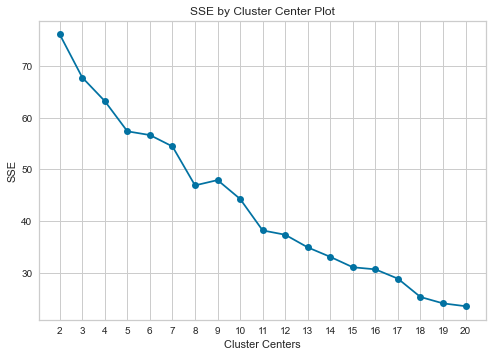

In [83]:
from sklearn.cluster import KMeans
def find_optimal_clusters(data, max_k):
    iters = range(2, max_k+1, 1)
    
    sse = []
    for k in iters:
        sse.append(MiniBatchKMeans(n_clusters=k, init='k-means++', max_iter=100, n_init=1).fit(data).inertia_)
        #print('Fit {} clusters'.format(k))
        
    f, ax = plt.subplots(1, 1)
    ax.plot(iters, sse, marker='o')
    ax.set_xlabel('Cluster Centers')
    ax.set_xticks(iters)
    ax.set_xticklabels(iters)
    ax.set_ylabel('SSE')
    ax.set_title('SSE by Cluster Center Plot')
    
find_optimal_clusters(text, 20)

Elbow Method to determine the number of clusters to be formed:


/Users/swathipathaikara/miniforge3/envs/tensorflow/lib/python3.9/site-packages/sklearn/utils/validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/swathipathaikara/miniforge3/envs/tensorflow/lib/python3.9/site-packages/sklearn/utils/validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/swathipathaikara/miniforge3/envs/tensorflow/lib/python3.9/site-packages/sklearn/utils/validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://nu

/Users/swathipathaikara/miniforge3/envs/tensorflow/lib/python3.9/site-packages/sklearn/utils/validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/swathipathaikara/miniforge3/envs/tensorflow/lib/python3.9/site-packages/sklearn/utils/validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/swathipathaikara/miniforge3/envs/tensorflow/lib/python3.9/site-packages/sklearn/utils/validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://nu

/Users/swathipathaikara/miniforge3/envs/tensorflow/lib/python3.9/site-packages/sklearn/utils/validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/swathipathaikara/miniforge3/envs/tensorflow/lib/python3.9/site-packages/sklearn/utils/validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/swathipathaikara/miniforge3/envs/tensorflow/lib/python3.9/site-packages/sklearn/utils/validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://nu

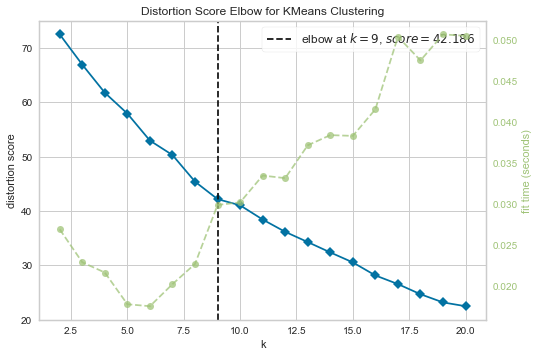

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [79]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
# Quick examination of elbow method to find numbers of clusters to make.
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=20)
Elbow_M.fit(text)
Elbow_M.show()

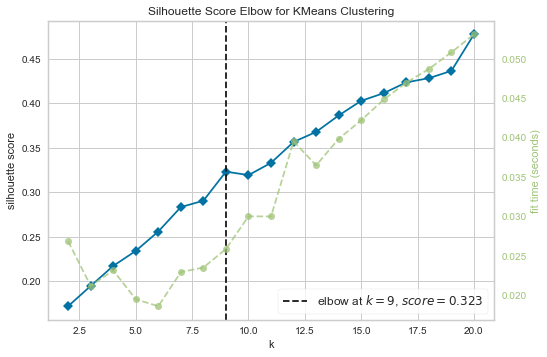

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [84]:
from yellowbrick.cluster import KElbowVisualizer
visualizer = KElbowVisualizer(KMeans(), k=20,metric='silhouette', timings= True)
visualizer.fit(text)        # Fit the data to the visualizer
visualizer.show() 

In [96]:
km = KMeans(n_clusters=9)
kmcl = km.fit_predict(text)
data["ClustersKM"] = kmcl

In [130]:
clusterskmeans = KMeans(n_clusters=9).fit_predict(text)

/Users/swathipathaikara/miniforge3/envs/tensorflow/lib/python3.9/site-packages/sklearn/utils/validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


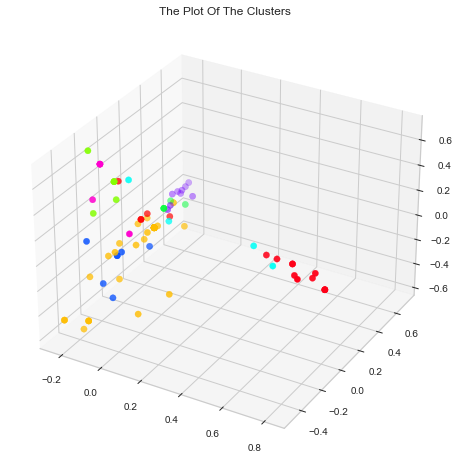

In [131]:
#Plotting the clusters

max_label = max(clusterskmeans)
max_items = np.random.choice(range(text.shape[0]), size=100, replace=False)
pca = PCA(n_components=3).fit_transform(text[max_items,:].todense())
idx = np.random.choice(range(pca.shape[0]), size=100, replace=False)
label_subset = clusterskmeans[max_items]
label_subset = [cm.hsv(i/max_label) for i in label_subset[idx]]

fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(pca[idx, 0], pca[idx, 1],pca[idx, 2], s=40, c=label_subset, marker='o', cmap = "crest")
ax.set_title("The Plot Of The Clusters")
plt.show()

/Users/swathipathaikara/miniforge3/envs/tensorflow/lib/python3.9/site-packages/sklearn/utils/validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/swathipathaikara/miniforge3/envs/tensorflow/lib/python3.9/site-packages/sklearn/utils/validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/swathipathaikara/miniforge3/envs/tensorflow/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/swathipathaikara/miniforge3/envs/tensorflow/lib/python3.

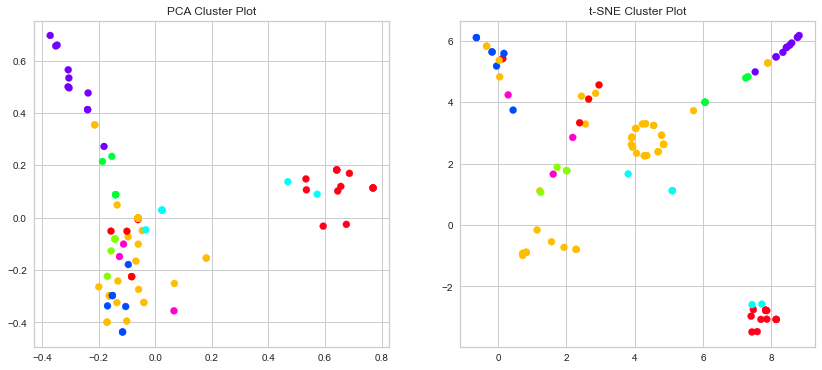

In [132]:
def plot_tsne_pca(data, labels):
    max_label = max(labels)
    max_items = np.random.choice(range(data.shape[0]), size=100, replace=False)
    
    pca = PCA(n_components=3).fit_transform(data[max_items,:].todense())
    tsne = TSNE().fit_transform(PCA(n_components=3).fit_transform(data[max_items,:].todense()))
    
    
    idx = np.random.choice(range(pca.shape[0]), size=100, replace=False)
    label_subset = labels[max_items]
    label_subset = [cm.hsv(i/max_label) for i in label_subset[idx]]
    
    f, ax = plt.subplots(1, 2, figsize=(14, 6))
    
    ax[0].scatter(pca[idx, 0], pca[idx, 1], c=label_subset)
    ax[0].set_title('PCA Cluster Plot')
    
    ax[1].scatter(tsne[idx, 0], tsne[idx, 1], c=label_subset)
    ax[1].set_title('t-SNE Cluster Plot')
    
plot_tsne_pca(text, clusterskmeans)

In [133]:
print("Top terms per cluster:")
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
terms = tfidf.get_feature_names()
for i in range(9):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' '\t' % terms[ind]),
    print

Top terms per cluster:
Cluster 0:
 world	
 watch	
 second	
 final	
 win	
 gold	
 women	
 claim	
 mp	
 cancer	
Cluster 1:
 bbc	
 govern	
 mp	
 use	
 need	
 second	
 claim	
 uk	
 studi	
 research	
Cluster 2:
 scientist	
 use	
 research	
 studi	
 drug	
 women	
 need	
 uk	
 world	
 govern	
Cluster 3:
 new	
 bbc	
 studi	
 women	
 mp	
 research	
 uk	
 say	
 win	
 govern	
Cluster 4:
 eu	
 leav	
 uk	
 referendum	
 claim	
 say	
 bbc	
 govern	
 mp	
 cancer	
Cluster 5:
 say	
 cancer	
 drug	
 research	
 world	
 need	
 claim	
 england	
 eu	
 final	
Cluster 6:
 cancer	
 drug	
 claim	
 use	
 studi	
 win	
 research	
 scientist	
 new	
 uk	
Cluster 7:
 england	
 gold	
 watch	
 claim	
 world	
 need	
 cancer	
 drug	
 eu	
 final	
Cluster 8:
 space	
 research	
 new	
 need	
 say	
 mp	
 cancer	
 claim	
 drug	
 england	


/Users/swathipathaikara/miniforge3/envs/tensorflow/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [134]:
Y = tfidf.transform(["world is watching final match"])
prediction = km.predict(Y)
print(prediction)

[0]


In [135]:
Y = tfidf.transform(["A research from uk scientist"])
prediction = km.predict(Y)
print(prediction)

[2]


In [146]:
Y = tfidf.transform(["I have cancer"])
prediction = km.predict(Y)
print(prediction)

[6]


In [147]:
Y = tfidf.transform(["It is election time"])
prediction = km.predict(Y)
print(prediction)

[1]


In [93]:
Y = data.Document[110]
l = data.Label[110]
print(Y,l)

The scientific mystery behind one of British science's most famous insects has finally been solved. Science


In [136]:
vec = TfidfVectorizer(stop_words="english")
vec.fit(data.Document)
features = vec.transform(data.Document)

In [137]:
cls1 = KMeans(n_clusters=4)
cls1.fit(features)

KMeans(n_clusters=4)

In [138]:
cls1.predict(features)

array([2, 1, 2, 1, 2, 2, 1, 3, 2, 2, 2, 2, 1, 1, 1, 3, 2, 1, 2, 3, 2, 2,
       3, 3, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 2,
       2, 2, 2, 2, 3, 3, 2, 3, 2, 2, 1, 2, 3, 2, 0, 2, 2, 3, 3, 2, 2, 3,
       2, 2, 2, 0], dtype=int32)

In [139]:
pca = PCA(n_components=2, random_state=5)
reduced_features = pca.fit_transform(features.toarray())

# reduce the cluster centers to 2D
reduced_cluster_centers = pca.transform(cls1.cluster_centers_)

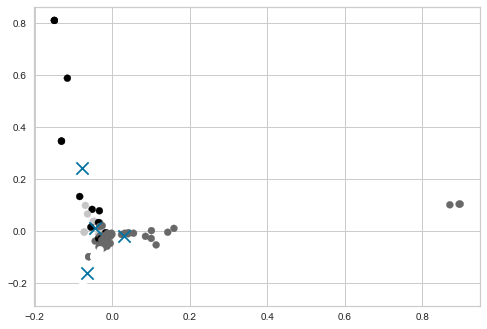

In [140]:
plt.scatter(reduced_features[:,0], reduced_features[:,1], c=cls1.predict(features))
plt.scatter(reduced_cluster_centers[:, 0], reduced_cluster_centers[:,1], marker='x', s=150, c='b')

In [141]:
from sklearn.metrics import homogeneity_score
homogeneity_score(data.Label, cls1.predict(features))

0.2009058365837875

In [142]:
from sklearn.metrics import silhouette_score
silhouette_score(features, labels=cls1.predict(features))

0.014884752600814195